# Week 12 Lab — **SVM Exercises**

**How to use**
- Work top-to-bottom. Cells with `# TODO` are for you to complete.
- Run each cell; if metric warnings appear, check class balance or thresholds.
- Add brief notes after each step to explain your choices.

# Support Vector Machine (SVM) - Classification and Linear SVM

## 1. Introduction to Support Vector Machines

<b>Support vector machine</b> is an algorithm belonging to the group of the so called maximum margin classifiers. SVMs became popular in the early 90' due to their ability to solve classification, regression and novelty detection problems.

The largest advantage of the SVMs is the approach to these problems through the concept of margin, which can be defined as the smallest distance between any data point and the decision boundary. The SVM chooses the decision boundary for which the margin is maximized.

The other advantage of SVM is that, even though the naive training approach would be a non-linear optimization, the objective function is convex. This makes the opimization rather straightforward, when approached correctly. Direct solution could be very complex, so one can convert the main problem into much simpler tasks.

An example for the solution is a quadratic programming problem, in which we are trying to minimize a quadratic function subjected to a set of linear inequality constraints.


## 2. Key Concepts in SVM

### 2.1 Hyperplanes

A hyperplane is a decision boundary that separates data points of different classes in the feature space.
In 2D space, a hyperplane is simply a line, and in 3D space, it’s a plane. In higher dimensions, it's called a hyperplane.


### 2.2 Decision Boundaries
1. Decision boundaries are the lines or surfaces that separate classes in the feature space. <br>
2. SVM tries to find the optimal decision boundary that maximizes the distance between the classes.

### 2.3 Margin

The margin is the distance between the decision boundary (hyperplane) and the closest data points from each class. 
These closest points are called "support vectors." SVM aims to maximize this margin to achieve the best separation.


### 2.4 Linearly Separable Data

Linearly separable data can be perfectly separated by a straight line (or hyperplane in higher dimensions).

### 2.5 Non-Separable Data

Non-separable data cannot be perfectly separated by a linear decision boundary. In these cases, SVM uses kernel functions to project data into higher dimensions, making it easier to classify.

## 3. Implementing SVM for Classification (Linear and Non-Linear)

### 3.1 Import Libraries

---
### Step 1 — Data loading / creation
Read the instructions above, then complete the TODOs in the next cell.

In [1]:
# Run this cell as-is
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split

### 3.2 Generating and Visualizing Data

Let's start by generating some sample data for both linearly separable and non-separable cases.

---
### Step 2 — Data loading / creation
Read the instructions above, then complete the TODOs in the next cell.

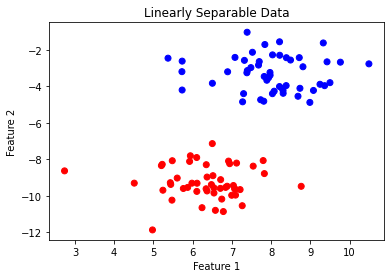

In [4]:
# Run this cell as-is
# Here, we use make_blobs to generate two clusters of points that can be separated by a straight line.
X_linear, y_linear = make_blobs(n_samples=100, centers=2, random_state=6)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='bwr')
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

---
### Step 3 — Data loading / creation
Read the instructions above, then complete the TODOs in the next cell.

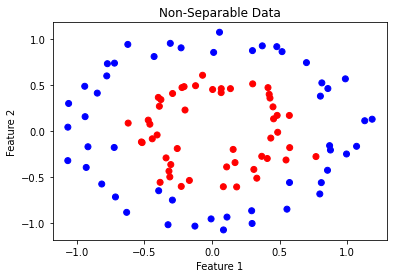

In [5]:
# Run this cell as-is
# Here, we use make_circles to create a dataset that cannot be separated by a straight line.
X_non_linear, y_non_linear = make_circles(n_samples=100, factor=0.5, noise=0.1)
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, cmap='bwr')
plt.title("Non-Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 3.3 Linear SVM for Linearly Separable Data

Let's apply a linear SVM on the linearly separable dataset and visualize the decision boundary, margin, and support vectors.

#### Step 1: Initialize and Fit the Model
We use the SVC class from sklearn.svm with a linear kernel.

---
### Step 4 — SVM — LinearSVC / linear kernel
Read the instructions above, then complete the TODOs in the next cell.

In [6]:
# Setting C=1.0 (default) means we are not heavily penalizing misclassification errors, allowing some flexibility.
# TODO: complete this step
linear_svm = SVC(kernel='linear', C=1.0)
# TODO: complete this step
linear_svm.fit(X_linear, y_linear)

# TODO: Fill in the code above, then run this cell.

SVC(kernel='linear')

#### Step 2: Plot Decision Boundary and Margin

---
### Step 5 — Prediction
Read the instructions above, then complete the TODOs in the next cell.

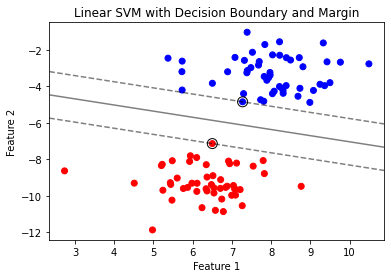

In [7]:
def plot_decision_boundary(clf, X, y):
    # Scatter plot of the data points
    # TODO: complete this step
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    
    # Get the current axis
    # TODO: complete this step
    ax = plt.gca()
    
    # Get the limits of the plot
    # TODO: complete this step
    xlim = ax.get_xlim()
    # TODO: complete this step
    ylim = ax.get_ylim()
    
    # Create a grid to evaluate the model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    # TODO: complete this step
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    # TODO: complete this step
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    # TODO: complete this step
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    # TODO: complete this step
    plt.title("Linear SVM with Decision Boundary and Margin")
    # TODO: complete this step
    plt.xlabel("Feature 1")
    # TODO: complete this step
    plt.ylabel("Feature 2")
    # TODO: complete this step
    plt.show()

plot_decision_boundary(linear_svm, X_linear, y_linear)

# TODO: Fill in the code above, then run this cell.

#### Step 3: Interpretation
The solid line is the decision boundary, and the dashed lines represent the margin on either side. 
The points circled in black are the support vectors, the closest points to the boundary, which define the margin width.


---
### Step 6 — SVM — RBF / nonlinear kernel
Read the instructions above, then complete the TODOs in the next cell.

In [8]:
# Non-Linear SVM for Non-Separable Data
# Applying a non-linear SVM with an RBF kernel to handle the non-separable data.

# Step 1: Initialize and Fit Model with RBF Kernel
# The RBF kernel can create non-linear decision boundaries by mapping data to a higher-dimensional space.
# TODO: complete this step
rbf_svm = SVC(kernel='rbf', C=1.0)
# TODO: complete this step
rbf_svm.fit(X_non_linear, y_non_linear)

# TODO: Fill in the code above, then run this cell.

SVC()

---
### Step 7 — Exercise step
Read the instructions above, then complete the TODOs in the next cell.

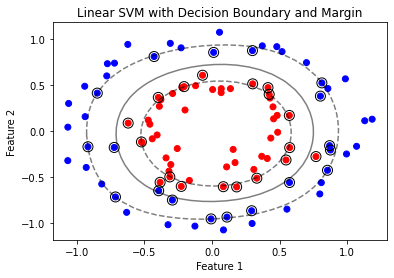

In [9]:
# TODO: Implement the required code for this step below
# Step 2: Plot Decision Boundary
plot_decision_boundary(rbf_svm, X_non_linear, y_non_linear)

# Interpretation:
# The decision boundary is now a curve, showing that SVM with an RBF kernel can classify non-linearly separable data.

## 4. Hyperplanes in 2D and 3D

Hyperplanes are fundamental to understanding how SVMs classify data.

### 1. Import libraries

---
### Step 8 — Imports
Read the instructions above, then complete the TODOs in the next cell.

In [10]:
# Run this cell as-is
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 2. Hyperplanes in 2D

A hyperplane in 2D is simply a line that separates two classes. For example, given the equation of a hyperplane: w1*x1 + w2*x2 + b = 0. This equation represents a line in a 2D space.

Let's start by visualizing a 2D hyperplane.

---
### Step 9 — Visualization / decision boundary
Read the instructions above, then complete the TODOs in the next cell.

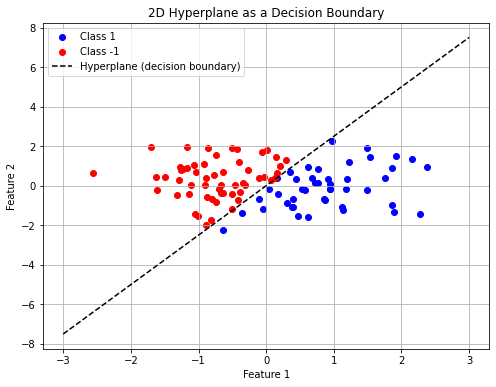

In [11]:
# Generate some 2D data points
np.random.seed(0)
X_2D = np.random.randn(100, 2)
y_2D = np.sign(X_2D[:, 0] * 0.5 + X_2D[:, 1] * -0.2)

# Plot the data points
# TODO: complete this step
plt.figure(figsize=(8, 6))
# TODO: complete this step
plt.scatter(X_2D[y_2D == 1, 0], X_2D[y_2D == 1, 1], color='b', label='Class 1')
# TODO: complete this step
plt.scatter(X_2D[y_2D == -1, 0], X_2D[y_2D == -1, 1], color='r', label='Class -1')

# Define the hyperplane line
# We assume w1 = 0.5, w2 = -0.2, and b = 0 for simplicity
# Then the equation becomes: 0.5*x1 - 0.2*x2 = 0, or x2 = 2.5*x1
x_vals = np.linspace(-3, 3, 100) # the np.linspace function generates 100 equally spaced values between -3 and 3
y_vals = 2.5 * x_vals  # slope of the line

# Plot the hyperplane line
# TODO: complete this step
plt.plot(x_vals, y_vals, 'k--', label="Hyperplane (decision boundary)")

# Add labels and legend
# TODO: complete this step
plt.xlabel("Feature 1")
# TODO: complete this step
plt.ylabel("Feature 2")
# TODO: complete this step
plt.title("2D Hyperplane as a Decision Boundary")
# TODO: complete this step
plt.legend()
# TODO: complete this step
plt.grid(True)
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

### In this plot:
- The black dashed line represents the hyperplane (or decision boundary).
- Points above the line are in one class, and points below are in another class.

### 3. Hyperplanes in 3D

In 3D, a hyperplane is a 2D plane that separates the space into two parts. The equation of a hyperplane in 3D is: w1*x1 + w2*x2 + w3*x3 + b = 0. This equation represents a plane in 3D space.

Let's create a visualization of a 3D hyperplane.

---
### Step 10 — Visualization / decision boundary
Read the instructions above, then complete the TODOs in the next cell.

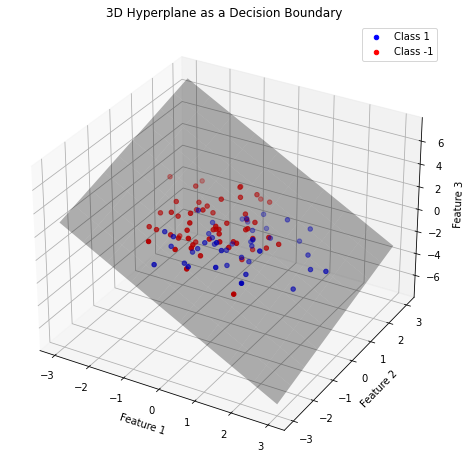

In [12]:
# Generate some 3D data points
X_3D = np.random.randn(100, 3)
y_3D = np.sign(X_3D[:, 0] * 0.5 + X_3D[:, 1] * -0.2 + X_3D[:, 2] * 0.3)

# Plot the data points in 3D
# TODO: complete this step
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Separate points by class
# TODO: complete this step
ax.scatter(X_3D[y_3D == 1, 0], X_3D[y_3D == 1, 1], X_3D[y_3D == 1, 2], color='b', label='Class 1')
# TODO: complete this step
ax.scatter(X_3D[y_3D == -1, 0], X_3D[y_3D == -1, 1], X_3D[y_3D == -1, 2], color='r', label='Class -1')

# Define the hyperplane (plane equation)
# For simplicity, we set w1 = 0.5, w2 = -0.2, w3 = 0.3, and b = 0.
# Then the equation becomes: 0.5*x1 - 0.2*x2 + 0.3*x3 = 0, or x3 = -(0.5/0.3)*x1 + (0.2/0.3)*x2
x_vals_3d = np.linspace(-3, 3, 10)
y_vals_3d = np.linspace(-3, 3, 10)
X_vals, Y_vals = np.meshgrid(x_vals_3d, y_vals_3d)
Z_vals = -(0.5 / 0.3) * X_vals + (0.2 / 0.3) * Y_vals  # plane equation

# Plot the hyperplane (3D plane)
# TODO: complete this step
ax.plot_surface(X_vals, Y_vals, Z_vals, color='k', alpha=0.3)

# Add labels and legend
# TODO: complete this step
ax.set_xlabel("Feature 1")
# TODO: complete this step
ax.set_ylabel("Feature 2")
# TODO: complete this step
ax.set_zlabel("Feature 3")
# TODO: complete this step
ax.set_title("3D Hyperplane as a Decision Boundary")
# TODO: complete this step
plt.legend()
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

#### In this plot:
- The black semi-transparent plane represents the hyperplane (or decision boundary).
- Points on either side of this plane belong to different classes.
- The SVM aims to find the optimal position of this plane that best separates the classes.

### 5. SVM Margins in 2D: Hard Margin and Soft Margin

#### 1. Import libraries

---
### Step 11 — Data loading / creation
Read the instructions above, then complete the TODOs in the next cell.

In [13]:
# Run this cell as-is
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

#### 2. Generate Linearly Separable Data

---
### Step 12 — Data loading / creation
Read the instructions above, then complete the TODOs in the next cell.

In [14]:
# Run this cell as-is
# For simplicity, let's generate two classes of data points that can be linearly separated
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Convert labels from (0,1) to (-1,1) for consistency with SVM
y = np.where(y == 0, -1, 1)

#### 3. Hard Margin SVM

- Definition: A hard margin SVM doesn’t allow any misclassification, assuming that the data is perfectly separable.
- Configuration: In sklearn, setting a large value for C (e.g., 1e6) enforces a hard margin. A large C penalizes any misclassified point heavily, so the model aims to perfectly separate the data.
- Visualization: <br>
    The decision boundary is the solid black line.<br>
    The dashed lines represent the margin.<br>
    Support vectors (circled points) are the closest points to the decision boundary and define the width of the margin.

---
### Step 13 — SVM — LinearSVC / linear kernel
Read the instructions above, then complete the TODOs in the next cell.

In [15]:
# When data is perfectly separable, we can use a hard margin. In sklearn, a hard margin is achieved by setting a very high `C` value.
# Here, we set C to a large number (1e6:1000,000) to enforce a hard margin.
# TODO: complete this step
hard_margin_svm = SVC(kernel='linear', C=1e6)
# TODO: complete this step
hard_margin_svm.fit(X, y)

# TODO: Fill in the code above, then run this cell.

SVC(C=1000000.0, kernel='linear')

---
### Step 14 — Prediction
Read the instructions above, then complete the TODOs in the next cell.

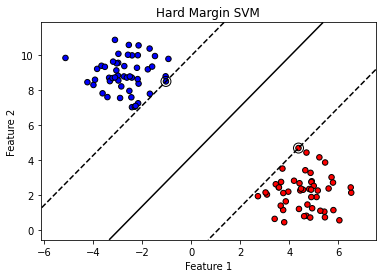

In [16]:
# Plotting the Hard Margin SVM
def plot_svm_margin(clf, X, y, title="SVM with Margin"):
    # Scatter plot of the data points
    # TODO: complete this step
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30, edgecolors='k')
    
    # Define the grid for plotting decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Get the decision function values for the grid
    # TODO: complete this step
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and margins
    # TODO: complete this step
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    # Plot support vectors
    # TODO: complete this step
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidth=1)
    
    # Labeling the plot
    # TODO: complete this step
    plt.xlim(x_min, x_max)
    # TODO: complete this step
    plt.ylim(y_min, y_max)
    # TODO: complete this step
    plt.xlabel("Feature 1")
    # TODO: complete this step
    plt.ylabel("Feature 2")
    # TODO: complete this step
    plt.title(title)
    # TODO: complete this step
    plt.show()

# Plot Hard Margin SVM
plot_svm_margin(hard_margin_svm, X, y, title="Hard Margin SVM")

# TODO: Fill in the code above, then run this cell.

#### In this plot:
- The black solid line is the decision boundary.
- The dashed lines represent the margin.
- The circled points are the support vectors, the closest points to the decision boundary that define the margin width.
- Since we're using a hard margin (large C), no points fall within the margin or are misclassified.

#### 4. Soft Margin SVM

- Definition: A soft margin SVM allows some misclassification to achieve a larger margin, which can improve generalization, especially with noisy or overlapping data.
- Configuration: Setting a smaller C value (e.g., 0.1) allows some data points to be misclassified or fall within the margin. A smaller C gives the model flexibility by not heavily penalizing every misclassified point.
- Visualization:<br>
    Some points can fall within the margin (between the dashed lines) or even on the wrong side of the decision boundary.<br>
    This setup is more suitable when data is noisy or not perfectly separable.

---
### Step 15 — SVM — LinearSVC / linear kernel
Read the instructions above, then complete the TODOs in the next cell.

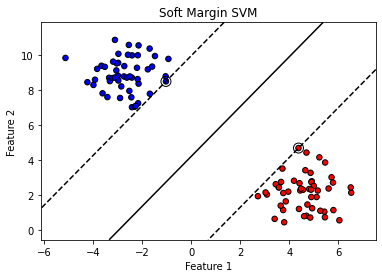

In [17]:
# For cases where the data is not perfectly separable or we want a larger margin at the cost of allowing some misclassification, we use a soft margin.
# A soft margin is achieved by setting a smaller `C` value, allowing some misclassification for a better generalization.
# TODO: complete this step
soft_margin_svm = SVC(kernel='linear', C=0.1)
# TODO: complete this step
soft_margin_svm.fit(X, y)

# Plot Soft Margin SVM
plot_svm_margin(soft_margin_svm, X, y, title="Soft Margin SVM")

# TODO: Fill in the code above, then run this cell.

#### In this plot:
- By setting C=0.1, we allow some misclassification and points within the margin.
- This provides a softer margin, allowing points to fall on the wrong side of the decision boundary or within the margin.
- In real-world data where perfect separation isn't possible, a soft margin (smaller C) helps achieve a balance between maximizing the margin and allowing some errors.

### 5. Observing the Effect of Different C Values on Margin

Let's visualize the margin behavior with varying values of C to see how the decision boundary and margin width change.

- We iterate through different values of C to observe how the margin and decision boundary change:
- Low C (e.g., 0.01): Creates a wide margin with more points allowed to fall within the margin or be misclassified.
- High C (e.g., 100 or 1e6): Creates a narrow margin, with the model attempting to separate classes perfectly, even if it leads to a smaller margin.
- This section helps to visualize how different C values impact the model’s tolerance for misclassification.


---
### Step 16 — SVM — LinearSVC / linear kernel
Read the instructions above, then complete the TODOs in the next cell.

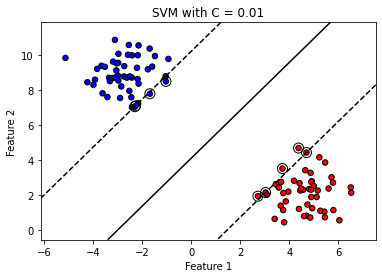

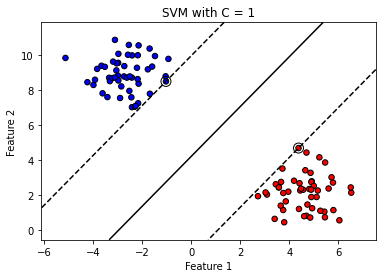

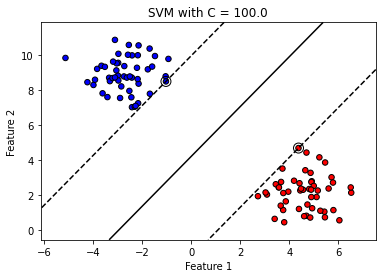

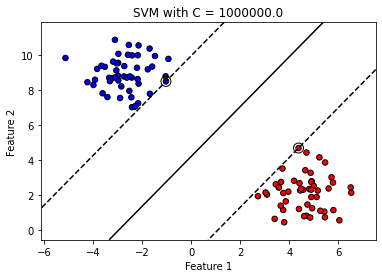

In [18]:
# Values of C to try
C_values = [1e-2, 1, 1e2, 1e6]

# Plot SVMs with different values of C
for C in C_values:
    # TODO: complete this step
    clf = SVC(kernel='linear', C=C)
    # TODO: complete this step
    clf.fit(X, y)
    plot_svm_margin(clf, X, y, title=f"SVM with C = {C}")

# TODO: Fill in the code above, then run this cell.